# Introduction to networkx

### Step 1: installing it

networkx does not come preinstalled with your python distribution (AFAIK). So you have to install it, for example using `pip install networkx` if you have a standard Python installation, or `conda install networkx` if you use anaconda/miniconda

### Step 2: importing it

In [16]:
import networkx as nx

### Step 3: creating a graph

<img src="graph1.png" alt="Example graph" style="width: 300px;"/>

In [17]:
# Directed graph
dg = nx.DiGraph()

# Add nodes
dg.add_node("A")
dg.add_node("B")
dg.add_node("C")
dg.add_node("D")
dg.add_node("E")
dg.add_node("F")
dg.add_node("G")
dg.add_node("H")
dg.add_node("I")

# Add edges (with weights)
dg.add_edge("A", "B", weight=2)
dg.add_edge("A", "D", weight=5)
dg.add_edge("A", "E", weight=4)
dg.add_edge("B", "E", weight=1)
dg.add_edge("C", "B", weight=3)
dg.add_edge("D", "G", weight=2)
dg.add_edge("E", "F", weight=3)
dg.add_edge("E", "H", weight=6)
dg.add_edge("F", "C", weight=4)
dg.add_edge("F", "H", weight=3)
dg.add_edge("G", "H", weight=1)
dg.add_edge("H", "I", weight=1)
dg.add_edge("I", "F", weight=1)



### Step 4: plotting

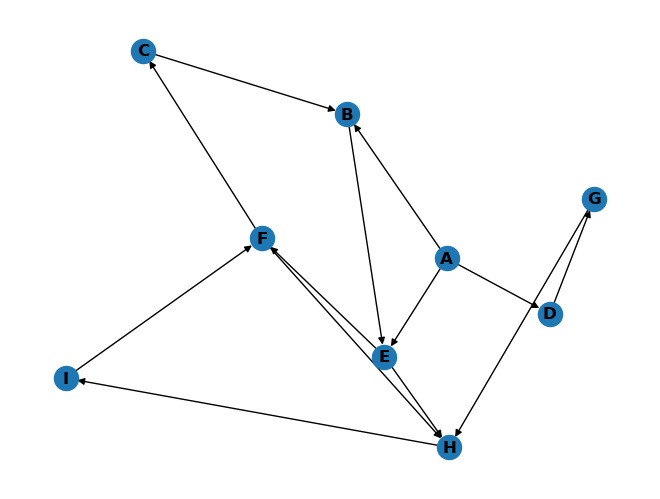

In [18]:
nx.draw(dg, with_labels=True, font_weight='bold')

In [35]:
def plot_with_graphviz(dg):
    from IPython.display import Image, display
    gg = nx.nx_agraph.to_agraph(dg)
    gg.draw('graphviz.png', prog='dot')
    display(Image('graphviz.png', width=200))
    

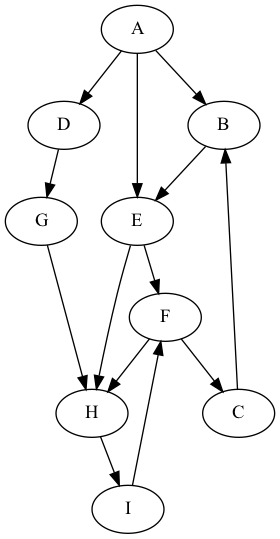

In [36]:
plot_with_graphviz(dg)

### Step 5: modifying graphs

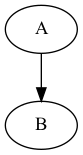

In [46]:
exdg = nx.DiGraph()
exdg.add_node("A")
exdg.add_node("B")
exdg.add_edge("A", "B", weight=2)
plot_with_graphviz(exdg)

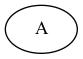

In [47]:
exdg.remove_node("B")
plot_with_graphviz(exdg)

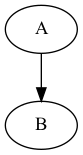

In [48]:
exdg.add_edge("A", "B", weight=2)
plot_with_graphviz(exdg)

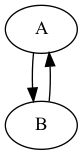

In [49]:
exdg.add_edge("B", "A", weight=2)  
plot_with_graphviz(exdg)

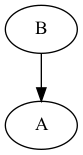

In [50]:
exdg.remove_edge("A", "B")
plot_with_graphviz(exdg)

### Step 6: algorithms on graphs
<img src="graph1.png" alt="Example graph" style="width: 300px;"/>

In [51]:
# DFS traversal of dg
for node in nx.dfs_preorder_nodes(dg, source="A"):
    print(node)

A
B
E
F
C
H
I
D
G


In [52]:
# BFS traversal of dg
for node in nx.bfs_edges(dg, source="A"):
    print(node)

('A', 'B')
('A', 'D')
('A', 'E')
('D', 'G')
('E', 'F')
('E', 'H')
('F', 'C')
('H', 'I')


In [58]:
# Shortest paths from A
ps = nx.shortest_path(dg, source="A", method="dijkstra")
ps

{'A': ['A'],
 'B': ['A', 'B'],
 'D': ['A', 'D'],
 'E': ['A', 'E'],
 'G': ['A', 'D', 'G'],
 'F': ['A', 'E', 'F'],
 'H': ['A', 'E', 'H'],
 'C': ['A', 'E', 'F', 'C'],
 'I': ['A', 'E', 'H', 'I']}

### Step 7 - DAGs

In [59]:
# What about dags?
nx.is_directed_acyclic_graph(dg)

False

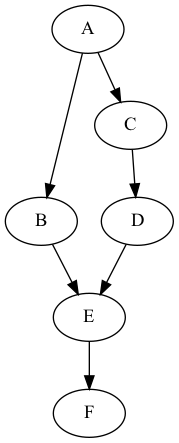

In [61]:
# Let's make a DAG!
dag = nx.DiGraph()
dag.add_edge("A", "B")
dag.add_edge("A", "C")
dag.add_edge("C", "D")
dag.add_edge("B", "E")
dag.add_edge("D", "E")
dag.add_edge("E", "F")
plot_with_graphviz(dag)

In [62]:
nx.is_directed_acyclic_graph(dag)

True

In [63]:
# Topological sort
for node in nx.topological_sort(dag):
    print(node)

A
B
C
D
E
F


### Step 8 - Undirected graphs
<img src="graph2.png" alt="Undirected graph" style="width: 300px;"/>

In [64]:
ug = nx.Graph()
ug.add_edge(0, 3, weight=3)
ug.add_edge(0, 4, weight=12)
ug.add_edge(3, 1, weight=5)
ug.add_edge(3, 2, weight=3)
ug.add_edge(4, 2, weight=7)
ug.add_edge(1, 2, weight=2)


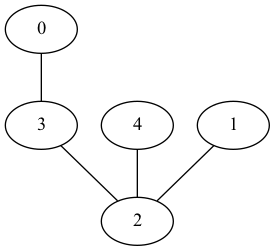

In [68]:
# Minimum spanning tree
mst = nx.minimum_spanning_tree(ug, algorithm="kruskal")
plot_with_graphviz(mst)

### Step 9 - Saving and loading graphs

In [87]:
# Saving/restoring graphs using pickle
# Save
import pickle
with open("mst.pickle", "wb") as f:
    pickle.dump(mst, f)
# Restore
with open("mst.pickle", "rb") as f:
    mst2 = pickle.load(f)

In [70]:
# Saving file using GraphML
nx.write_graphml(dg, "dg.graphml")
nx.write_graphml(ug, "ug.graphml")
nx.write_graphml(mst, "mst.graphml")

In [73]:
# Saving file using JSON
import json
from networkx.readwrite import json_graph
with open("dag.json", "w") as f:
    json.dump(json_graph.node_link_data(dag), f)

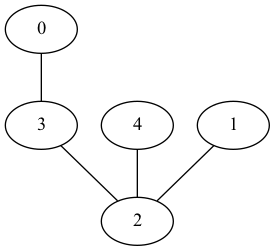

In [75]:
# Loading file using GraphML
dg = nx.read_graphml("dg.graphml") 
ug = nx.read_graphml("ug.graphml")
mst = nx.read_graphml("mst.graphml")
plot_with_graphviz(mst)

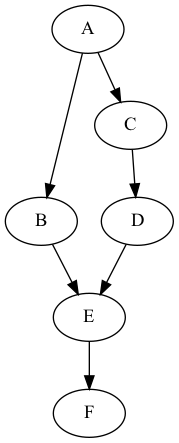

In [74]:
# Loading file using JSON
with open("dag.json", "r") as f:
    data = json.load(f)
    dag2 = json_graph.node_link_graph(data)
    plot_with_graphviz(dg2)

### Step 9 - Mixed algorithms
<img src="graph1.png" alt="Example graph" style="width: 300px;"/>

In [79]:
# Cycles?

# 1. Find any cycle:
cy = nx.find_cycle(dg)
cy

[('B', 'E'), ('E', 'F'), ('F', 'C'), ('C', 'B')]

In [80]:
# 2. Find all cycles:
cycles = list(nx.simple_cycles(dg))
cycles

[['C', 'B', 'E', 'F'], ['C', 'B', 'E', 'H', 'I', 'F'], ['F', 'H', 'I']]

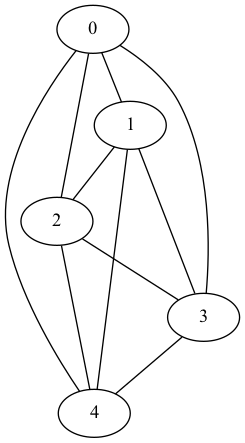

In [81]:
# Creating graphs with various structures
# Complete graph
kg = nx.complete_graph(5)
plot_with_graphviz(kg)

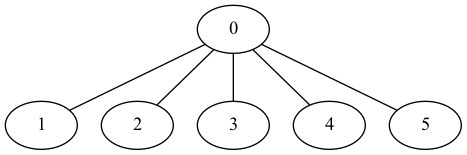

In [82]:
# Star graph
sg = nx.star_graph(5)
plot_with_graphviz(sg)

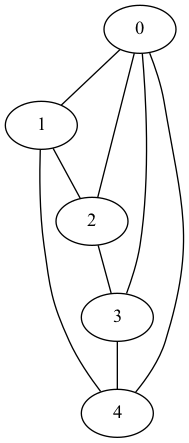

In [83]:
# Wheel graph
wg = nx.wheel_graph(5)
plot_with_graphviz(wg)

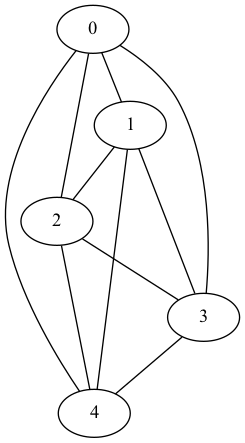

[3, 2, 4, 1, 0]

In [86]:
# Traveling Salesman Problem on a complete graph
# Complete graph
kg = nx.complete_graph(5)
plot_with_graphviz(kg)
# Solution
tsp = nx.approximation.traveling_salesman_problem(kg, cycle=False)
tsp